# Chapter 7: Orders of Reaction and Linear Regression Analysis

## Learning Objectives

By the end of this lecture, you should be able to:

1. **Identify reaction orders and rate laws** based on experimental data and understand their significance in chemical kinetics.
2. **Perform linear regression analysis** to determine reaction rate constants using Python and NumPy.
3. **Use integrated rate laws** to linearize reaction data and apply regression techniques to find rate constants.
4. **Visualize and interpret reaction kinetics** by plotting concentration vs. time and log-concentration vs. time graphs.

## Introduction

Recall that in Lecture 4 we determined how to use numerical methods to compute the equilibrium progress of a chemical reaction. This prediction corresponded to the final state of the reaction, but we did not consider the rate at which the reaction reached equilibrium. In this lecture, we will discuss how to determine the rate constant of a reaction using linear regression analysis.

### A Refresher or Primer on Rate Laws

The rate of a chemical reaction is the rate at which the reactants are consumed and the products are formed. It is described by a "rate law," which is an equation that relates the rate of a reaction to the concentration of the various chemical species present at time $t$. Rate laws are determined experimentally and cannot, in general, be derived from the stoichiometry of the reaction. Rate laws are typically expressed as:

$$
\text{rate} = k[A]^m[B]^n
$$

where $k$ is the "rate constant," $m$ and $n$ are the "orders of the reaction" with respect to reactants $A$ and $B$, respectively, and $[A]$ and $[B]$ are the concentrations of reactants $A$ and $B$, respectively.

### Orders of Reaction

The "order of reaction" with respect to a reactant is the power to which the concentration of that reactant is raised in the rate law. The overall order of the reaction is the sum of the orders of the reaction with respect to each reactant. The order of reaction is determined experimentally and is not related to the stoichiometry of the reaction.

| Rate law | Order | Units of $k$ | Integrated Rate Law |
|----------|-------|--------------| ---------------------|
| $\text{rate} = k$ | 0 | M/s | $[A] = -kt + [A]_0$ |
| $\text{rate} = k[A]$ | 1 | 1/s | $[A] = [A]_0e^{-kt}$ |
| $\text{rate} = k[A]^2$ | 2 | 1/(M s) | $1/[A] = kt + 1/[A]_0$ |
| $\text{rate} = k[A][B]$ | 2 | 1/(M s) | $1/[A] = kt + 1/[A]_0$ (assuming $[A]_0 = [B]_0$) |
| $\text{rate} = k[A]^{1/2}$ | 1/2 | M$^{1/2}$/s | $[A]^{1/2} = [A]_0^{1/2} - \frac{k}{2}t$ |
| $\text{rate} = k[A][B]^{1/2}$ | 3/2 | M$^{-1/2}$ s$^{-1}$ | $[A] = [A]_0 e^{-k't}$ (pseudo-first order approximation*) |

*The pseudo-first order approximation can be used when [B] is much greater than [A].

## Determining the Rate Constant of a Reaction

Imagine that your lab has purchased a container of 1.24 M N$_2$O$_5$(g). You retrieved the container from the freezer and were about to start the experiment when you realized you had a meeting with your PI. You left the container on the bench and forgot about it. When you returned to the lab, you found that the N$_2$O$_5$(g) had decomposed. Realizing the importance of the decomposition kinetics of N$_2$O$_5$(g) on the experiment you were planning, you suggested to your PI that you could determine the rate constant of the decomposition reaction. Your PI agreed and asked you to determine the rate constant of the decomposition of N$_2$O$_5$(g) at 318 K. You collected the following data:

| Time (min) | [N$_2$O$_5$] (M) |
|----------|-------------------|
| 0 | 1.24 |
| 10 | 0.92 |
| 20 | 0.68 |
| 30 | 0.50 |
| 40 | 0.37 |
| 50 | 0.28 |
| 60 | 0.20 |
| 70 | 0.15 |
| 80 | 0.11 |
| 90 | 0.08 |
| 100 | 0.06 |

Let's plot the data using matplotlib and numpy to determine how the concentration of N$_2$O$_5$(g) changes with time.

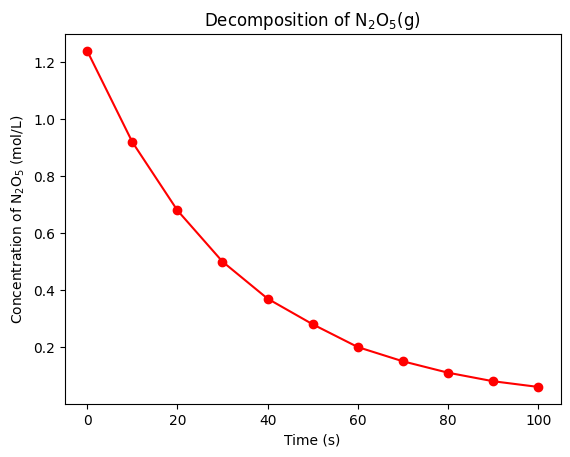

In [1]:
# Plot the concentration of N2O5(g) as a function of time

import numpy as np
import matplotlib.pyplot as plt

# Data
time = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
concentration = np.array([1.24, 0.92, 0.68, 0.50, 0.37, 0.28, 0.20, 0.15, 0.11, 0.08, 0.06])

# Plot
plt.plot(time, concentration, 'ro-')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of N$_2$O$_5$ (mol/L)')
plt.title('Decomposition of N$_2$O$_5$(g)')
plt.show()

The concentration of N$_2$O$_5$(g) as a function of time shows a clear exponential decay. This suggests that the decomposition of N$_2$O$_5$(g) is a first-order reaction. The rate law for a first-order reaction is:

$$
\text{rate} = k[N_2O_5]
$$

where $k$ is the rate constant and $[N_2O_5]$ is the concentration of N$_2$O$_5$(g). The integrated rate law for a first-order reaction is:

$$
[N_2O_5] = [N_2O_5]_0 e^{-kt}
$$

where $[N_2O_5]_0$ is the initial concentration of N$_2$O$_5$(g) and $t$ is the time. Alternatively, we can write the integrated rate law as:

$$
\ln([N_2O_5]) = \ln([N_2O_5]_0) - kt
$$

This equation is in the form of a linear equation, $y = mx + b$, where $y = \ln([N_2O_5])$, $m = -k$, $x = t$, and $b = \ln([N_2O_5]_0)$. We can use linear regression analysis to determine the rate constant of the reaction.

## Linear Regression Analysis

Linear regression analysis is a statistical method used to determine the relationship between two variables. In this case, we will use linear regression analysis to determine the rate constant of the decomposition of N$_2$O$_5$(g). We will focus on a type of linear regression called ordinary least squares (OLS).

### Ordinary Least Squares

OLS is a method used to estimate the parameters of a linear regression model. The goal of OLS is to minimize the sum of the squared differences between the observed values and the predicted values. The equation for a generic linear regression model with one independent variable is:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

where $i$ is the index of the data points [for example, the time points in our N$_2$O$_5$(g) decomposition experiment], $y_i$ is the dependent variable [for example, the concentration of N$_2$O$_5$(g)], $\beta_0$ is the intercept, $\beta_1$ is the slope, $x_i$ is the independent variable [for example, time], and $\epsilon_i$ is the error term. The goal of OLS is to minimize the sum of the squared differences between the observed values and the predicted values. We can do this by rewriting the equation in terms of the error term:

$$
\epsilon_i = y_i - \beta_0 - \beta_1 x_i
$$

The sum of the squared errors is:

$$
\text{SSE} = \sum_{i=1}^{n} \epsilon_i^2 = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2
$$

The OLS estimates of $\beta_0$ and $\beta_1$ are:

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

where $\bar{x}$ and $\bar{y}$ are the means of the independent and dependent variables, respectively.

### A Practical Example

Let's apply these formulas to a simple data set. Suppose we have the following data:

| $x$ | $y$ |
|-----|-----|
| 1 | 2 |
| 2 | 3 |
| 3 | 4 |
| 4 | 5 |
| 5 | 6 |

We can use the formulas above to determine the slope and intercept of the linear regression model. Let's calculate the slope and intercept using numpy and matplotlib. First, let's convert this table in numpy arrays.

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

Now, let's write a function that computes the OLS estimates of the slope.

In [ ]:
def ols_slope(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    return numerator / denominator

Now, let's write a function that computes the OLS estimates of the intercept.

In [ ]:
def ols_intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = ols_slope(x, y)
    return y_mean - slope * x_mean

Finally, let's put these together into a function that computes the slope and intercept of the linear regression model using OLS.

In [ ]:
def ols(x, y):
    slope = ols_slope(x, y)
    intercept = ols_intercept(x, y)
    return slope, intercept

Now, let's use this function to determine the slope and intercept of the linear regression model for the data set.

In [ ]:
slope, intercept = ols(x, y)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Very cool! We have successfully calculated the slope and intercept of the linear regression model using the OLS method. We can now use these values to determine the rate constant of the decomposition of N$_2$O$_5$(g).

## Back to the N$_2$O$_5$(g) Decomposition Experiment

Let's use the linear regression analysis to determine the rate constant of the decomposition of N$_2$O$_5$(g). We will use the functions we defined above to calculate the slope and intercept of the linear regression model for the N$_2$O$_5$(g) decomposition data.

Now, let's calculate the slope and intercept of the linear regression model for the N$_2$O$_5$(g) decomposition data.

In [ ]:
# Compute the natural log of the concentration
ln_concentration = np.log(concentration)

# Perform linear regression
slope, intercept = ols(time, ln_concentration)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Since the slope of the linear regression model is equal to $-k$, the rate constant of the decomposition of N$_2$O$_5$(g) is $3.04 \times 10^{-2}$ min$^{-1}$. Let's plot the linear regression model and the data to visualize the fit.

In [ ]:
# Plot the linear regression
plt.plot(time, ln_concentration, 'ro')
plt.plot(time, slope * time + intercept, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('ln[Concentration of N$_2$O$_5$ (mol/L)]')
plt.title('Decomposition of N$_2$O$_5$(g)')
plt.show()

That's an exceptional fit! Now you can confidently report the rate constant of the decomposition of N$_2$O$_5$(g) to your PI.

## Hands-On Activity

Your lab plans to start working with NOBr(g) in the near future. You have been asked to determine the rate constant of the decomposition of NOBr(g) at 298 K. You collected the following data:

| Time (s) | [NOBr] (M) |
|----------|-------------------|
| 0 | 0.0250 |
| 6.2 | 0.0191 |
| 10.8 | 0.0162 |
| 14.7 | 0.0144 |
| 20.0 | 0.0125 |
| 24.6 | 0.0112 |

```{admonition} Hint
To determine the rate constant, you first need to determine the order of the reaction. You can do this by plotting the data and determining the order of the reaction based on the shape of the curve. Once you have determined the order of the reaction, you can use linear regression analysis to determine the rate constant.
```